In [1]:
import qrcode
import PIL
import json
from qreader import QReader
import cv2

#just for jupyterlab testing
from IPython.display import Image
from ipywidgets import interact

#just doin this first cause it takes some time
qreader = QReader()

{'ssid': 'helloworld', 'pwd': 'dontcomein'}


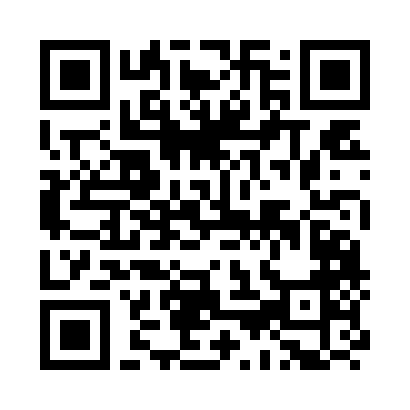

In [7]:


def encode_qr(creds,path):
    img = qrcode.make(creds)
    type(img)
    img.save(path)

ssid="helloworld"
pwd="dontcomein"
#fake wifi creds
creds_to_encode={
    "ssid":ssid,
    "pwd":pwd}
some_path="test.png"

print(creds_to_encode)
encode_qr(creds_to_encode,some_path)

Image(some_path)




In [36]:
#PI side initial idea...

#We want some background process that when a button is pushed, takes a photo with the arducam, then reads the qr code and if valid adds the network to the pi.
#i want error checks, perhaps add an led to detect the following:
#1.if the qr code is even detected (confidence > x)
#2.if the qr code contained a valid payload (it was a json obj, had a ssid and pwd)
#3 if the pi was able to connect to the internet with the valid payload





def get_confidence(image):  
    return qreader.detect(image)[0]["confidence"]

def get_text(image):
    text = qreader.detect_and_decode(image=image)[0]
    text=text.replace("'","\"")
    loaded_text=json.loads(text)
    return loaded_text

some_path="test.png"
try:
    image = cv2.cvtColor(cv2.imread(some_path), cv2.COLOR_BGR2RGB)
except:
    print("error loading image")



print(get_confidence(image))
x= get_text(image)
print(x)

0.9501312375068665
{'ssid': 'testing_1234', 'pwd': 'dontcomein'}
